<a href="https://colab.research.google.com/github/Swap1984/swapnil/blob/main/Assignment_SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [5]:
# loading the dataset
data_train = pd.read_csv('/content/twitter_training.csv')
data_val = pd.read_csv('/content/twitter_validation.csv')

In [6]:
column_names = ['ID', 'Entity', 'Sentiment', 'Tweet']
data_train.columns = column_names
data_train.head()
column_names = ['ID', 'Entity', 'Sentiment', 'Tweet']
data_val.columns = column_names
data_val.head()

,ID,Entity,Sentiment,Tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
# Replace NaN with empty strings
data_train['Tweet'] = data_train['Tweet'].fillna("")
data_val['Tweet'] = data_val['Tweet'].fillna("")

In [8]:
# Convert all values to strings
data_train['Tweet'] = data_train['Tweet'].astype(str)
data_val['Tweet'] = data_val['Tweet'].astype(str)


In [9]:
# Parameters
vocab_size = 10000  # Limit the vocabulary size to the top 10000 words
max_length = 100    # Maximum sequence length
oov_token = "<OOV>" # Token for out-of-vocabulary words

# Initialize and fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(data_train['Tweet'])  # Fit on training data

In [10]:
# Tokenize and pad training data
x_train_seq = tokenizer.texts_to_sequences(data_train['Tweet'])
x_train_padded = pad_sequences(x_train_seq, maxlen=max_length, padding='post')

# Tokenize and pad validation data
x_val_seq = tokenizer.texts_to_sequences(data_val['Tweet'])
x_val_padded = pad_sequences(x_val_seq, maxlen=max_length, padding='post')

In [11]:
# Label encoding for multi-class labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(data_train['Sentiment'])  # Assuming the column name for sentiment is 'sentiment'
y_val = encoder.transform(data_val['Sentiment'])

# Check the unique labels after encoding
print(encoder.classes_)

['Irrelevant' 'Negative' 'Neutral' 'Positive']


In [12]:

# Parameters
embedding_dim = 128
# Build the RNN model
model = Sequential([
    # Embedding layer to convert integer sequences to dense vectors
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),  # Input layer
    # Simple RNN layer
    SimpleRNN(64, return_sequences=False),  # Hidden layer (64 units)
    # Dropout(0.5),  # Dropout for regularization
    # Output layer (softmax for multi-class classification)
    Dense(4, activation='softmax')  # Output layer with 3 units (for 3 classes: Positive, Negative, Neutral)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
# Compile the model
from tensorflow.keras.optimizers import Adam
optimizer = Adam (learning_rate=0.0001)  # Experiment with 0.0005 or 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,292,612 (4.93 MB)

 Trainable params: 1,292,612 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    x_train_padded, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_val_padded, y_val)
)

Epoch 1/50
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 68s 57ms/step - accuracy: 0.5394 - loss: 1.1407 - val_accuracy: 0.5906 - val_loss: 1.0650
Epoch 2/50
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.5691 - loss: 1.0895 - val_accuracy: 0.6216 - val_loss: 1.0132
Epoch 3/50
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 66s 56ms/step - accuracy: 0.5940 - loss: 1.0533 - val_accuracy: 0.6527 - val_loss: 0.9780
Epoch 4/50
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 64s 55ms/step - accuracy: 0.6142 - loss: 1.0256 - val_accuracy: 0.6787 - val_loss: 0.9263
Epoch 5/50
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 66s 57ms/step - accuracy: 0.6320 - loss: 0.9943 - val_accuracy: 0.6997 - val_loss: 0.8852
Epoch 6/50
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.6461 - loss: 0.9669 - val_accuracy: 0.7147 - val_loss: 0.8645
Epoch 7/50
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.6617 - loss: 0.9387 - val_accuracy: 0.7257 - val_loss: 0.8307
Epoch 8/50
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.6699 -

We see that the traing and validation accuracy are almost close to each other the model thus is performing well. on thr trained data the parameters if tunned more precisely can give better results.

In [37]:
# Make predictions on new text
example_text = ["This product is hazardous never bye this!"]  # Replace with your own text
example_seq = tokenizer.texts_to_sequences(example_text)
example_padded = pad_sequences(example_seq, maxlen=max_length, padding="post")

In [38]:
# Predict sentiment
predicted_prob = model.predict(example_padded)
predicted_class = encoder.inverse_transform([predicted_prob.argmax(axis=1)[0]])

print(f"Predicted Sentiment: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Sentiment: Irrelevant


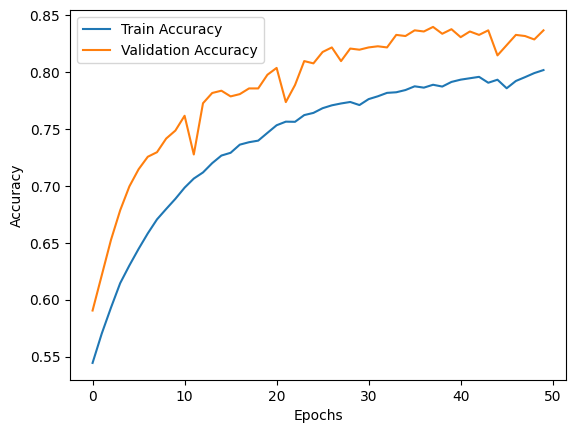

In [35]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

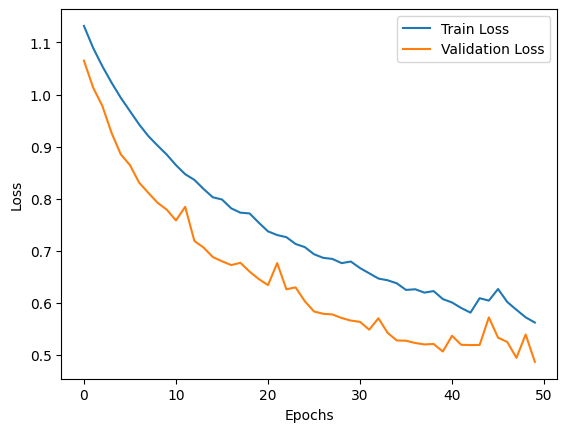

In [36]:
# Plot training and validation loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()